In [123]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


In [94]:
# reconstructed_model = keras.models.load_model("model_9Oct_batch32_size64.h5")
reconstructed_model = keras.models.load_model("model_14Nov_batch32_size64_4_balancedDataset.h5")


In [95]:
batch_size = 32
img_height = 64
img_width = 64
class_names=['Medium', 'Not_Ripe', 'Ripe']

In [96]:
img = keras.preprocessing.image.load_img(
    'SingleTest/cha (3).jpg', target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = reconstructed_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Not_Ripe with a 99.99 percent confidence.


In [97]:
import pandas as pd
data = pd.read_csv('TestResult.csv', header=None)
test_result = [0]*39 + [1]*45+[2]*20
print(test_result)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [147]:
def buildConfusion(modelFile,size=64):
    y_pred = []
    batch_size = 32
    img_height = size
    img_width = size
#photo 1-42 Medium
#photo 43-88 Not ripe
#phto  88-108 Ripe
# class_names=['Medium', 'Not_Ripe', 'Ripe']
    ans=[]
    count=0
    reconstructed_model = keras.models.load_model(modelFile+'.h5')
    print('=============================================================================================')
    print(f'Evaulating Model : {modelFile}')
    print('=============================================================================================')
    for i in range(1,105):
        img = keras.preprocessing.image.load_img(
        f'Testing/papaya ({i}).png', target_size=(img_height, img_width)
        )
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        predictions = reconstructed_model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        if(i<40):
            if(np.argmax(score)==0):
                count+=1
            else:
                print(f" Papaya ({i}).png Mismatch : See \"Medium\" as \"{class_names[np.argmax(score)]}\" ")
        elif(i<85):
            if(np.argmax(score)==1):
                count+=1
            else:
                print(f" Papaya ({i}).png Mismatch : See \"Not_Ripe\" as \"{class_names[np.argmax(score)]}\" ")
        elif(i<105):
            if(np.argmax(score)==2):
                count+=1
            else:
                print(f" Papaya ({i}).png Mismatch : See \"Ripe\" as \"{class_names[np.argmax(score)]}\" ")

        
        ans.append(f"{i}: {class_names[np.argmax(score)]}")
        y_pred.append(np.argmax(score))
    print('---------------------------------------------------------------------------------------------')
    print(f"Efficientcy: {count/104}")
    print(f"Confusion Matrix: ")
    print('---------------------------------------------------------------------------------------------')
#     print(y_pred)
#     print(test_result)
    cm = confusion_matrix(test_result, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    print('=============================================================================================')
    print('\n\n')
    return 



# print(y_pred)

In [145]:
ListOfModelSize64 = ['model1_dataset1','model4_embedded_augmentation_30Epoch_dataset2','model4_embedded_augmentation_50Epoch_dataset2','model4_embedded_augmentation_100Epoch_dataset2','model5_embedded_augmentation_50Epoch_dataset3','model6_embedded_augmentation_100Epoch_dataset3']


Evaulating Model : model1_dataset1
 Papaya (1).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (2).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (7).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (10).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (17).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (28).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (32).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (36).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (89).png Mismatch : See "Ripe" as "Medium" 
---------------------------------------------------------------------------------------------
Efficientcy: 0.9134615384615384
Confusion Matrix: 
---------------------------------------------------------------------------------------------


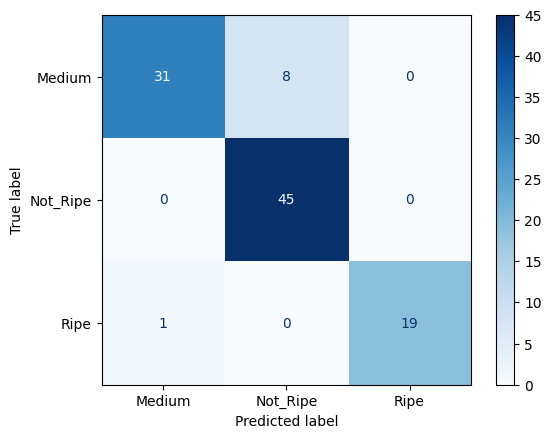




Evaulating Model : model4_embedded_augmentation_30Epoch_dataset2
 Papaya (2).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (17).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (28).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (32).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (72).png Mismatch : See "Not_Ripe" as "Medium" 
 Papaya (83).png Mismatch : See "Not_Ripe" as "Medium" 
 Papaya (85).png Mismatch : See "Ripe" as "Medium" 
---------------------------------------------------------------------------------------------
Efficientcy: 0.9326923076923077
Confusion Matrix: 
---------------------------------------------------------------------------------------------


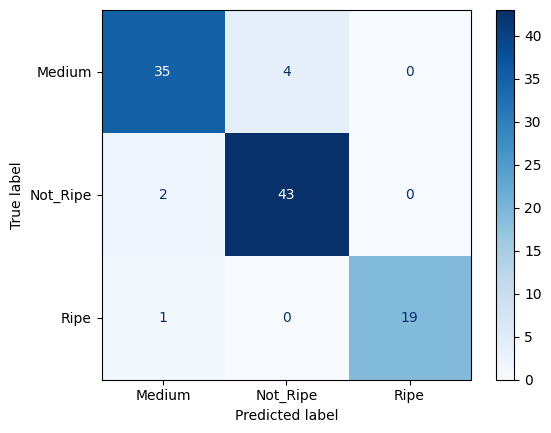




Evaulating Model : model4_embedded_augmentation_50Epoch_dataset2
 Papaya (2).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (32).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (85).png Mismatch : See "Ripe" as "Medium" 
 Papaya (90).png Mismatch : See "Ripe" as "Medium" 
---------------------------------------------------------------------------------------------
Efficientcy: 0.9615384615384616
Confusion Matrix: 
---------------------------------------------------------------------------------------------


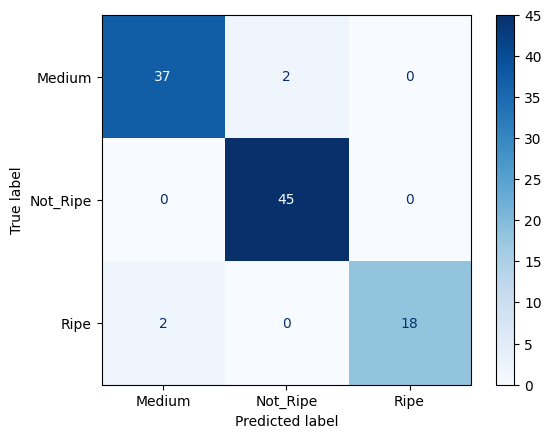




Evaulating Model : model4_embedded_augmentation_100Epoch_dataset2
 Papaya (2).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (4).png Mismatch : See "Medium" as "Ripe" 
---------------------------------------------------------------------------------------------
Efficientcy: 0.9807692307692307
Confusion Matrix: 
---------------------------------------------------------------------------------------------


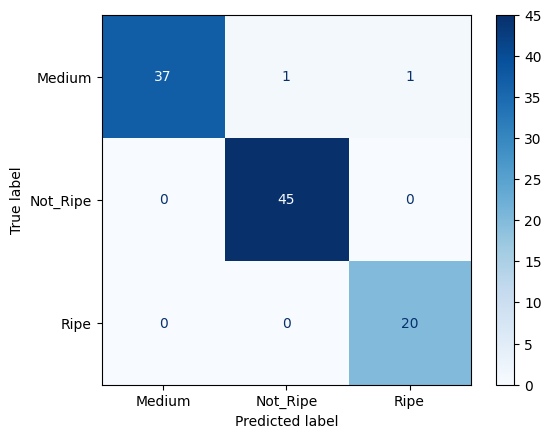




Evaulating Model : model5_embedded_augmentation_50Epoch_dataset3
 Papaya (2).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (4).png Mismatch : See "Medium" as "Ripe" 
 Papaya (7).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (83).png Mismatch : See "Not_Ripe" as "Medium" 
---------------------------------------------------------------------------------------------
Efficientcy: 0.9615384615384616
Confusion Matrix: 
---------------------------------------------------------------------------------------------


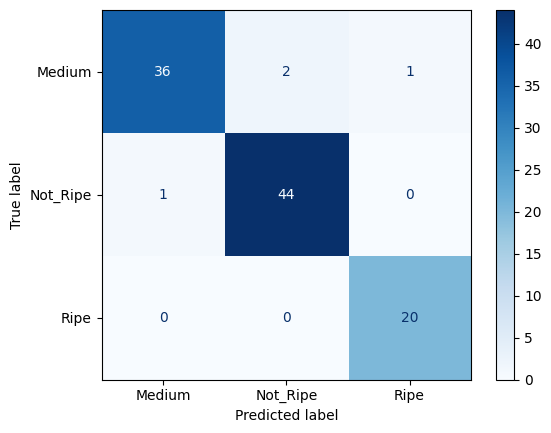




Evaulating Model : model5_embedded_augmentation_100Epoch_dataset3
 Papaya (79).png Mismatch : See "Not_Ripe" as "Medium" 
 Papaya (83).png Mismatch : See "Not_Ripe" as "Medium" 
---------------------------------------------------------------------------------------------
Efficientcy: 0.9807692307692307
Confusion Matrix: 
---------------------------------------------------------------------------------------------


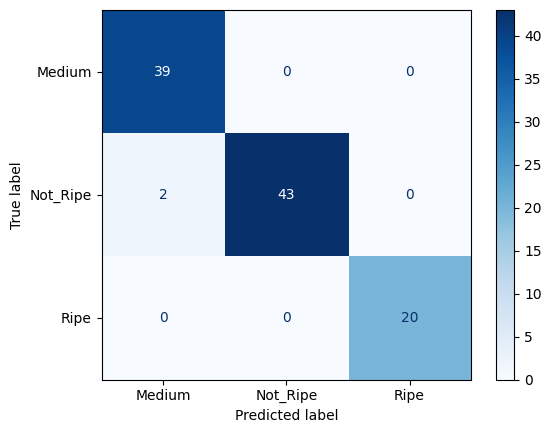

In [146]:
for i in range(0,len(ListOfModelSize64)):
    buildConfusion(ListOfModelSize64[i])


Evaulating Model : model2_manual_augmentation_dataset2
 Papaya (1).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (2).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (4).png Mismatch : See "Medium" as "Ripe" 
 Papaya (5).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (6).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (8).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (14).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (90).png Mismatch : See "Ripe" as "Medium" 
---------------------------------------------------------------------------------------------
Efficientcy: 0.9230769230769231
Confusion Matrix: 
---------------------------------------------------------------------------------------------


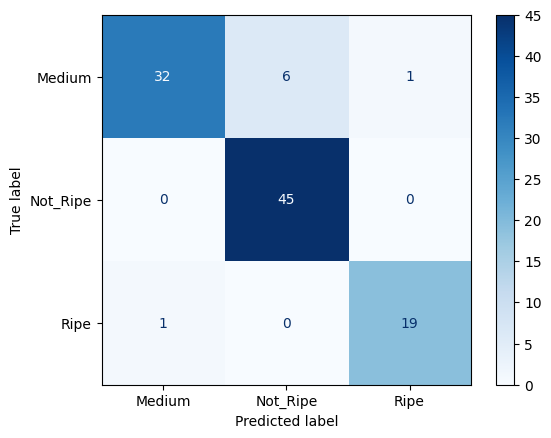




Evaulating Model : model3_embedded_augmentation_20Epoch_dataset2
 Papaya (2).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (4).png Mismatch : See "Medium" as "Ripe" 
 Papaya (5).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (17).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (28).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (32).png Mismatch : See "Medium" as "Not_Ripe" 
 Papaya (85).png Mismatch : See "Ripe" as "Medium" 
 Papaya (90).png Mismatch : See "Ripe" as "Medium" 
---------------------------------------------------------------------------------------------
Efficientcy: 0.9230769230769231
Confusion Matrix: 
---------------------------------------------------------------------------------------------


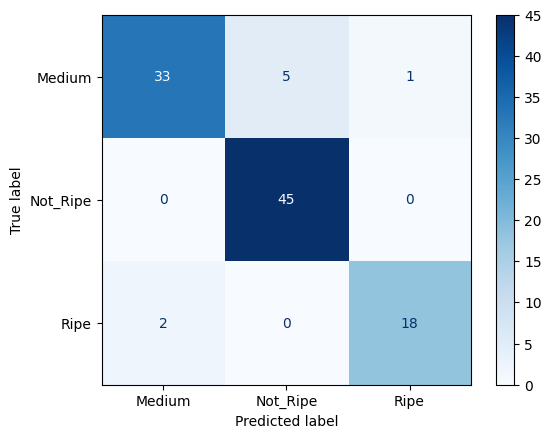

In [149]:
ListOfModelSize80=['model2_manual_augmentation_dataset2', 'model3_embedded_augmentation_20Epoch_dataset2']
for i in range(0,len(ListOfModelSize80)):
    buildConfusion(ListOfModelSize80[i],80)
